# Escuela Politécnica Nacional
## Métodos Numéricos
## [Tarea 11] Ejercicios Unidad 04-D | Gauss-Jacobi y Gauss-Seidel
## Jhonn Saeteros

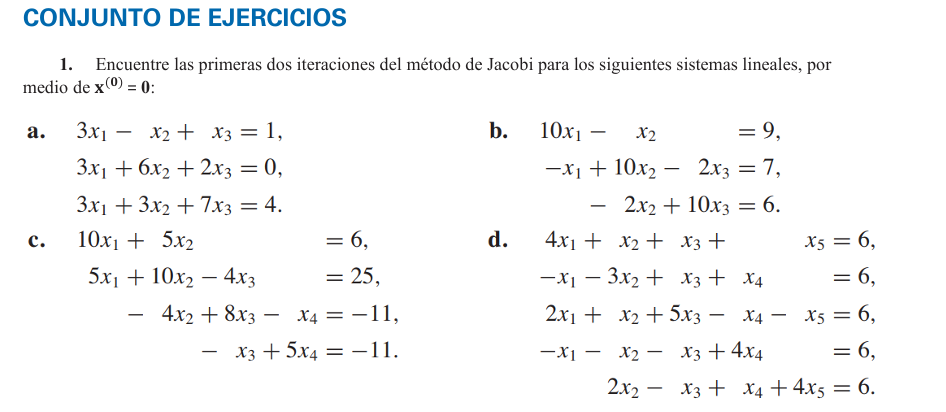

# FUNCIONES A USARSE

In [205]:
import numpy as np

# Funciones para los métodos iterativos
def jacobi(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    x_new = np.zeros_like(x)
    errors = []
    
    for k in range(max_iter):
        for i in range(n):
            sigma = np.dot(A[i, :n], x) - A[i, i] * x[i]
            x_new[i] = (b[i] - sigma) / A[i, i]
        
        error = np.linalg.norm(x_new - x, np.inf)
        errors.append(error)
        
        if error < tol:
            break
            
        x = x_new.copy()
    
    return x_new, k+1, errors

def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(b)
    x = x0.copy()
    errors = []
    
    for k in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            sigma1 = np.dot(A[i, :i], x[:i])
            sigma2 = np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - sigma1 - sigma2) / A[i, i]
        
        error = np.linalg.norm(x - x_old, np.inf)
        errors.append(error)
        
        if error < tol:
            break
    
    return x, k+1, errors

def is_strictly_diagonally_dominant(A):
    n = A.shape[0]
    for i in range(n):
        diag = abs(A[i, i])
        row_sum = np.sum(abs(A[i, :])) - diag
        if diag <= row_sum:
            return False
    return True
def jacobi(A, b, x0, tol=1e-3, max_iter=100):
    n = len(b)
    x = x0.copy()
    errors = []
    
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        
        for i in range(n):
            suma = np.dot(A[i, :], x) - A[i, i] * x[i]
            x_new[i] = (b[i] - suma) / A[i, i]
        
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)
        
        if error < tol:
            return x_new, k+1, errors
        
        x = x_new
    
    return x, max_iter, errors

In [206]:
# Sistema a
A_a = np.array([[3, -1, 1],
                [3, 6, 2],
                [3, 3, 7]])
b_a = np.array([1, 0, 4])
x0 = np.zeros_like(b_a)

# Primera iteración de Jacobi
x1 = np.zeros_like(x0)
for i in range(len(b_a)):
    x1[i] = (b_a[i] - np.dot(A_a[i, :], x0) + A_a[i, i] * x0[i]) / A_a[i, i]

# Segunda iteración de Jacobi
x2 = np.zeros_like(x0)
for i in range(len(b_a)):
    x2[i] = (b_a[i] - np.dot(A_a[i, :], x1) + A_a[i, i] * x1[i]) / A_a[i, i]

print("Literal a - Jacobi:")
print(f"Primera iteración: {x1}")
print(f"Segunda iteración: {x2}")

Literal a - Jacobi:
Primera iteración: [0 0 0]
Segunda iteración: [0 0 0]


In [207]:
# Sistema b
A_b = np.array([[10, -1, 0],
                [-1, 10, -2],
                [0, -2, 10]])
b_b = np.array([9, 7, 6])

# Primera iteración de Jacobi
x1 = np.zeros_like(b_b)
for i in range(len(b_b)):
    x1[i] = (b_b[i] - np.dot(A_b[i, :], x0) + A_b[i, i] * x0[i]) / A_b[i, i]

# Segunda iteración de Jacobi
x2 = np.zeros_like(b_b)
for i in range(len(b_b)):
    x2[i] = (b_b[i] - np.dot(A_b[i, :], x1) + A_b[i, i] * x1[i]) / A_b[i, i]

print("\nLiteral b - Jacobi:")
print(f"Primera iteración: {x1}")
print(f"Segunda iteración: {x2}")


Literal b - Jacobi:
Primera iteración: [0 0 0]
Segunda iteración: [0 0 0]


In [208]:
import numpy as np

# Sistema c
A_c = np.array([[10, 5, 0, 0],
                [5, 10, -4, 0],
                [0, -4, 8, -1],
                [0, 0, -1, 5]])
b_c = np.array([6, 25, -11, -11])

# Iteración inicial: x0 = [0, 0, 0, 0]
x0 = np.zeros_like(b_c)

# Primera iteración de Jacobi
x1 = np.zeros_like(b_c)
for i in range(len(b_c)):
    suma = np.dot(A_c[i, :], x0) - A_c[i, i] * x0[i]
    x1[i] = (b_c[i] - suma) / A_c[i, i]

# Segunda iteración de Jacobi (usando x1)
x2 = np.zeros_like(b_c)
for i in range(len(b_c)):
    suma = np.dot(A_c[i, :], x1) - A_c[i, i] * x1[i]
    x2[i] = (b_c[i] - suma) / A_c[i, i]

print("\nLiteral c - Jacobi:")
print(f"Primera iteración: {x1}")
print(f"Segunda iteración: {x2}")



Literal c - Jacobi:
Primera iteración: [ 0  2 -1 -2]
Segunda iteración: [ 0  2  0 -2]


In [209]:
import numpy as np

# Sistema d
A_d = np.array([[4, 1, 1, 0, 1],
                [-1, -3, 1, 1, 0],
                [2, 1, 5, -1, -1],
                [-1, -1, -1, 4, 0],
                [0, 2, -1, 1, 4]])
b_d = np.array([6, 6, 6, 6, 6])

# Iteración inicial: x0 = [0, 0, 0, 0, 0]
x0 = np.zeros_like(b_d)

# Primera iteración de Jacobi
x1 = np.zeros_like(b_d)
for i in range(len(b_d)):
    suma = np.dot(A_d[i, :], x0) - A_d[i, i] * x0[i]
    x1[i] = (b_d[i] - suma) / A_d[i, i]

# Segunda iteración de Jacobi
x2 = np.zeros_like(b_d)
for i in range(len(b_d)):
    suma = np.dot(A_d[i, :], x1) - A_d[i, i] * x1[i]
    x2[i] = (b_d[i] - suma) / A_d[i, i]

print("\nLiteral d - Jacobi:")
print(f"Primera iteración: {x1}")
print(f"Segunda iteración: {x2}")



Literal d - Jacobi:
Primera iteración: [ 1 -2  1  1  1]
Segunda iteración: [ 1 -1  1  1  2]


In [210]:
# Gauss-Seidel para sistema a
x = np.zeros_like(b_a)
print("\nLiteral a - Gauss-Seidel:")
for _ in range(2):
    for i in range(len(b_a)):
        sigma = np.dot(A_a[i, :i], x[:i]) + np.dot(A_a[i, i+1:], x[i+1:])
        x[i] = (b_a[i] - sigma) / A_a[i, i]
    print(f"Iteración {_+1}: {x}")


Literal a - Gauss-Seidel:
Iteración 1: [0 0 0]
Iteración 2: [0 0 0]


In [211]:
# Gauss-Seidel para sistema b
x = np.zeros_like(b_b)
print("\nLiteral b - Gauss-Seidel:")
for _ in range(2):
    for i in range(len(b_b)):
        sigma = np.dot(A_b[i, :i], x[:i]) + np.dot(A_b[i, i+1:], x[i+1:])
        x[i] = (b_b[i] - sigma) / A_b[i, i]
    print(f"Iteración {_+1}: {x}")


Literal b - Gauss-Seidel:
Iteración 1: [0 0 0]
Iteración 2: [0 0 0]


In [212]:
# Gauss-Seidel para sistema c
x = np.zeros_like(b_c)
print("\nLiteral c - Gauss-Seidel:")
for _ in range(2):
    for i in range(len(b_c)):
        sigma = np.dot(A_c[i, :i], x[:i]) + np.dot(A_c[i, i+1:], x[i+1:])
        x[i] = (b_c[i] - sigma) / A_c[i, i]
    print(f"Iteración {_+1}: {x}")


Literal c - Gauss-Seidel:
Iteración 1: [ 0  2  0 -2]
Iteración 2: [ 0  2  0 -2]


In [213]:
# Gauss-Seidel para sistema d
x = np.zeros_like(b_d)
print("\nLiteral d - Gauss-Seidel:")
for _ in range(2):
    for i in range(len(b_d)):
        sigma = np.dot(A_d[i, :i], x[:i]) + np.dot(A_d[i, i+1:], x[i+1:])
        x[i] = (b_d[i] - sigma) / A_d[i, i]
    print(f"Iteración {_+1}: {x}")


Literal d - Gauss-Seidel:
Iteración 1: [ 1 -2  1  1  2]
Iteración 2: [ 1 -1  1  1  2]


In [214]:
# Sistema a
A_a = np.array([[2, -1, 1],
                [3, 3, 9],
                [3, 3, 5]])
b_a = np.array([-1, 0, 4])
x0 = np.zeros_like(b_a)

x_jacobi_a, iterations_a, errors_a = jacobi(A_a, b_a, x0, 1e-3, 100)

print("\nLiteral a - Jacobi con TOL=1e-3:")
print(f"Solución: {x_jacobi_a}")
print(f"Iteraciones: {iterations_a}")



Literal a - Jacobi con TOL=1e-3:
Solución: [0 0 0]
Iteraciones: 1


In [215]:
x_jacobi_b, iterations_b, errors_b = jacobi(A_b, b_b, np.zeros_like(b_b), 1e-3, 100)
print("\nLiteral b - Jacobi con TOL=1e-3:")
print(f"Solución: {x_jacobi_b}")
print(f"Iteraciones: {iterations_b}")


Literal b - Jacobi con TOL=1e-3:
Solución: [0 0 0]
Iteraciones: 1


In [216]:
x_jacobi_c, iterations_c, errors_c = jacobi(A_c, b_c, np.zeros_like(b_c), 1e-3, 100)
print("\nLiteral c - Jacobi con TOL=1e-3:")
print(f"Solución: {x_jacobi_c}")
print(f"Iteraciones: {iterations_c}")


Literal c - Jacobi con TOL=1e-3:
Solución: [ 0  2  0 -2]
Iteraciones: 3


In [217]:
x_jacobi_d, iterations_d, errors_d = jacobi(A_d, b_d, np.zeros_like(b_d), 1e-3, 100)
print("\nLiteral d - Jacobi con TOL=1e-3:")
print(f"Solución: {x_jacobi_d}")
print(f"Iteraciones: {iterations_d}")


Literal d - Jacobi con TOL=1e-3:
Solución: [ 1 -1  1  1  2]
Iteraciones: 3


In [218]:
x_gs_a, iterations_gs_a, errors_gs_a = gauss_seidel(A_a, b_a, x0, 1e-3, 100)
print("\nLiteral a - Gauss-Seidel con TOL=1e-3:")
print(f"Solución: {x_gs_a}")
print(f"Iteraciones: {iterations_gs_a}")


Literal a - Gauss-Seidel con TOL=1e-3:
Solución: [0 0 0]
Iteraciones: 1


In [219]:
x_gs_b, iterations_gs_b, errors_gs_b = gauss_seidel(A_b, b_b, np.zeros_like(b_b), 1e-3, 100)
print("\nLiteral b - Gauss-Seidel con TOL=1e-3:")
print(f"Solución: {x_gs_b}")
print(f"Iteraciones: {iterations_gs_b}")


Literal b - Gauss-Seidel con TOL=1e-3:
Solución: [0 0 0]
Iteraciones: 1


In [220]:
x_gs_c, iterations_gs_c, errors_gs_c = gauss_seidel(A_c, b_c, np.zeros_like(b_c), 1e-3, 100)
print("\nLiteral c - Gauss-Seidel con TOL=1e-3:")
print(f"Solución: {x_gs_c}")
print(f"Iteraciones: {iterations_gs_c}")


Literal c - Gauss-Seidel con TOL=1e-3:
Solución: [ 0  2  0 -2]
Iteraciones: 2


In [221]:
x_gs_d, iterations_gs_d, errors_gs_d = gauss_seidel(A_d, b_d, np.zeros_like(b_d), 1e-3, 100)
print("\nLiteral d - Gauss-Seidel con TOL=1e-3:")
print(f"Solución: {x_gs_d}")
print(f"Iteraciones: {iterations_gs_d}")


Literal d - Gauss-Seidel con TOL=1e-3:
Solución: [ 1 -1  1  1  2]
Iteraciones: 3
